In [207]:
#!pip install xgboost

In [208]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [209]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('result.csv',low_memory=False)
result = []
df

,Unnamed: 0,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,SOUNDEX,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_DISTRIT,ID_BAIRRO,NM_BAIRRO,ID_LOGRADO,ID_GEO1,ID_GEO2,NM_REFEREN,CS_ZONA,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_CHIK_S1,DT_CHIK_S2,DT_PRNT,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,HOSPITAL,DDD_HOSP,TEL_HOSP,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,CODISINF,CO_BAINF,NOBAIINF,CLASSI_FIN,CRITERIO,DOENCA_TRA,CLINC_CHIK,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,DT_GRAV,MANI_HEMOR,EPISTAXE,GENGIVO,METRO,PETEQUIAS,HEMATURA,SANGRAM,LACO_N,PLASMATICO,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,NU_LOTE_I,DS_OBS,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,NU_LOTE_V,NU_LOTE_H,CS_FLXRET,FLXRECEBI,IDENT_MICR,MIGRADO_W,ID_CNS_SUS_HASHED
0,6,501,2,A90,2016-03-07,201610,2016,29,291560,1388.0,2414155.0,2016-03-05,201609,NaN,4055.0,F,5.0,4.0,1.0,29.0,291560,1388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2016-03-07,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,2016-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2016-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
1,336,507898,2,A90,2016-01-19,201603,2016,29,292740,1380.0,3808.0,2015-01-15,201502,NaN,4029.0,F,2.0,9.0,9.0,29.0,292740,1380.0,50.0,150.0,PIATA,NaN,NaN,NaN,NaN,1.0,1.0,2016-01-19,111220.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2.0,9.0,NaN,1.0,NaN,2016-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PACIENTE GESTANTE 19 SEMANAS, APRESENTA CEFALÉ...",2.0,NaN,2016-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,7.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
2,444,122892,2,A90,2016-01-13,201602,2016,29,293330,1398.0,2402076.0,2016-01-05,201601,NaN,4023.0,I,6.0,NaN,9.0,29.0,293330,1398.0,NaN,297.0,LAGOA FORMOSA,NaN,NaN,NaN,NaN,2.0,1.0,2016-01-13,NaN,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,29.0,1.0,293330.0,NaN,NaN,NaN,10.0,2.0,NaN,NaN,9.0,NaN,2016-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PACIENTE APRESENTOU PURIDO,FEBRE,MIALGIA",2.0,NaN,2016-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
3,622,100258,2,A90,2016-01-06,201601,2016,29,291360,1385.0,2415844.0,2016-01-05,201601,NaN,4040.0,M,6.0,9.0,NaN,29.0,291360,1385.0,NaN,10.0,ESPERANCA,NaN,NaN,NaN,VENDA DE VAL,1.0,1.0,2016-01-06,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [210]:
campos = [
    'ID_DISTRIT','CS_FLXRET','FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA',
    'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N',
    'LEUCOPENIA', 'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL',
    'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE','CLASSI_FIN'
]
df = df[campos]
df = df[df['CLASSI_FIN'].isin([5, 8, 10, 11, 12])]
df.loc[df['CLASSI_FIN'] >= 10,'CLASSI_FIN'] = 0
df.loc[df['CLASSI_FIN'] != 0,'CLASSI_FIN'] = 1

In [211]:
df.dropna(inplace=True)
df.isna().any()


ID_DISTRIT    False
CS_FLXRET     False
FEBRE         False
MIALGIA       False
CEFALEIA      False
EXANTEMA      False
VOMITO        False
NAUSEA        False
DOR_COSTAS    False
CONJUNTVIT    False
ARTRITE       False
ARTRALGIA     False
PETEQUIA_N    False
LEUCOPENIA    False
LACO          False
DOR_RETRO     False
DIABETES      False
HEMATOLOG     False
HEPATOPAT     False
RENAL         False
HIPERTENSA    False
ACIDO_PEPT    False
AUTO_IMUNE    False
CLASSI_FIN    False
dtype: bool

In [212]:
df.describe()

,ID_DISTRIT,CS_FLXRET,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,CLASSI_FIN
count,17910.000000,17910.000000,17910.000000,17910.000000,17910.000000,17910.000000,17910.000000,17910.000000,17910.000000,17910.000000,17910.00000,17910.000000,17910.000000,17910.000000,17910.000000,17910.000000,17910.000000,17910.000000,17910.000000,17910.000000,17910.000000,17910.000000,17910.000000,17910.000000
mean,142.583473,0.245673,1.063652,1.251870,1.272920,1.832887,1.809548,1.820436,1.923562,1.980235,1.96756,1.685204,1.964210,1.970073,1.994919,1.794249,1.976159,1.994417,1.993914,1.996817,1.937353,1.992853,1.996538,0.753155
std,196.163275,0.430497,0.244138,0.434099,0.445473,0.373087,0.392669,0.383835,0.265705,0.139197,0.17717,0.464448,0.185772,0.170392,0.071102,0.404261,0.152559,0.074516,0.077777,0.056326,0.242333,0.084239,0.058736,0.431188
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,49.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,51.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,53.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,563.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [213]:
from imblearn.under_sampling import RandomUnderSampler
X = df.drop(columns=['CLASSI_FIN'])
y = df['CLASSI_FIN']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state=42)

rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X_train, y_train)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, stratify=y_train, test_size=0.2, random_state=42)

In [214]:
xgb = XGBClassifier(objective='binary:logistic', seed=42)
xgb.fit(X_train,
        y_train,
        verbose=True,
        eval_set=[(X_val, y_val)])

[0]	validation_0-logloss:0.61895
[1]	validation_0-logloss:0.57966
[2]	validation_0-logloss:0.55575
[3]	validation_0-logloss:0.54009
[4]	validation_0-logloss:0.53034
[5]	validation_0-logloss:0.52681
[6]	validation_0-logloss:0.52281
[7]	validation_0-logloss:0.51922
[8]	validation_0-logloss:0.51921
[9]	validation_0-logloss:0.51694
[10]	validation_0-logloss:0.51519
[11]	validation_0-logloss:0.51540
[12]	validation_0-logloss:0.51504
[13]	validation_0-logloss:0.51511
[14]	validation_0-logloss:0.51407
[15]	validation_0-logloss:0.51206
[16]	validation_0-logloss:0.51221
[17]	validation_0-logloss:0.51165
[18]	validation_0-logloss:0.51170
[19]	validation_0-logloss:0.51152
[20]	validation_0-logloss:0.51108
[21]	validation_0-logloss:0.51097
[22]	validation_0-logloss:0.50988
[23]	validation_0-logloss:0.51017
[24]	validation_0-logloss:0.50999
[25]	validation_0-logloss:0.50990
[26]	validation_0-logloss:0.51000
[27]	validation_0-logloss:0.51006
[28]	validation_0-logloss:0.50980
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [215]:
y_pred = xgb.predict(X_test)

result.append(['XGBoost', precision_score(y_test, y_pred).round(2), recall_score(y_test, y_pred).round(2), f1_score(y_test, y_pred).round(2)])

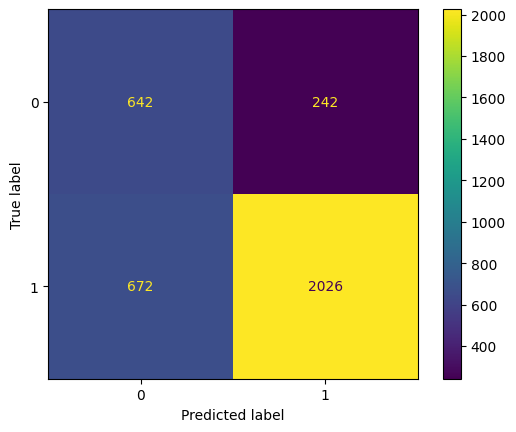

In [216]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()
plt.show()

In [217]:
precision_score(y_test, y_pred)

0.8932980599647267

In [218]:
recall_score(y_test, y_pred)

0.7509266123054115

In [219]:
f1_score(y_test, y_pred)

0.8159484494563028

In [220]:
model_path = 'xgb.txt'
with open(model_path, 'wb') as file:
    pickle.dump(xgb, file)

X_test_path = 'X_test.txt'
with open(X_test_path, 'wb') as file:
    pickle.dump(X_test, file)

y_test_path = 'y_test.txt'
with open(y_test_path, 'wb') as file:
    pickle.dump(y_test, file)

In [221]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
result.append(['K-Nearest Neighbors', precision_score(y_test, y_pred).round(2), recall_score(y_test, y_pred).round(2), f1_score(y_test, y_pred).round(2)])

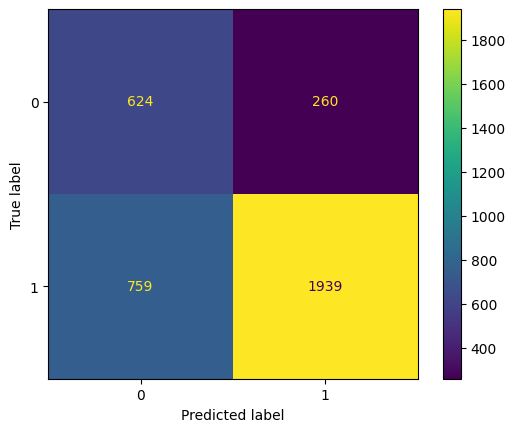

In [222]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()
plt.show()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()
plt.show()

In [223]:
precision_score(y_test, y_pred)

0.8817644383810823

In [224]:
recall_score(y_test, y_pred)

0.7186805040770942

In [225]:
f1_score(y_test, y_pred)

0.7919134163773739

In [226]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1)
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

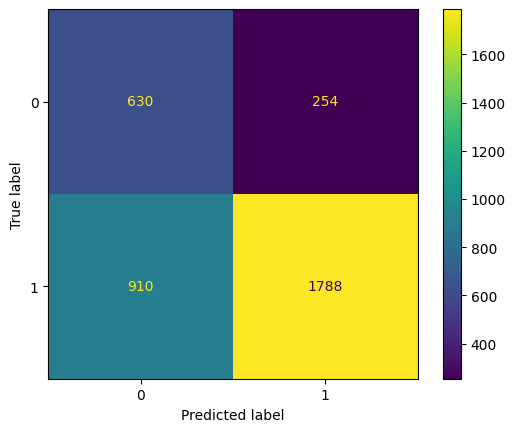

In [227]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()
plt.show()

In [228]:
precision_score(y_test, y_pred)

0.8756121449559255

In [229]:
recall_score(y_test, y_pred)

0.6627131208302446

In [230]:
f1_score(y_test, y_pred)

0.7544303797468355

In [231]:
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.optimizers import Adam
nn = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(100,activation='relu'),
    Dense(100,activation='relu'),
    Dense(1,activation='sigmoid')]
    )

optimizer = Adam(0.001)
nn.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

nn.fit(X_train, y_train, epochs=200, validation_data=(X_val,y_val), batch_size=32)

y_pred = nn.predict(X_test)
y_classes = ((y_pred > 0.5)+0).ravel()

result.append(['Neural Network', precision_score(y_test, y_classes).round(2), recall_score(y_test, y_classes).round(2), f1_score(y_test, y_classes).round(2)])


Epoch 1/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5458 - loss: 1.0255 - val_accuracy: 0.5011 - val_loss: 1.0147
Epoch 2/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5192 - loss: 0.8200 - val_accuracy: 0.5866 - val_loss: 0.6746
Epoch 3/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5223 - loss: 0.8980 - val_accuracy: 0.5837 - val_loss: 0.6927
Epoch 4/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5528 - loss: 0.7657 - val_accuracy: 0.5046 - val_loss: 1.0621
Epoch 5/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5286 - loss: 0.8376 - val_accuracy: 0.5859 - val_loss: 0.6651
Epoch 6/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5466 - loss: 0.8312 - val_accuracy: 0.5894 - val_loss: 0.6657
Epoch 7/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5702 - loss: 0.7531 - val_accuracy: 0.5972 - val_loss: 0.7325
Epoch 8/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5787 - loss: 0.7451 - val_accu

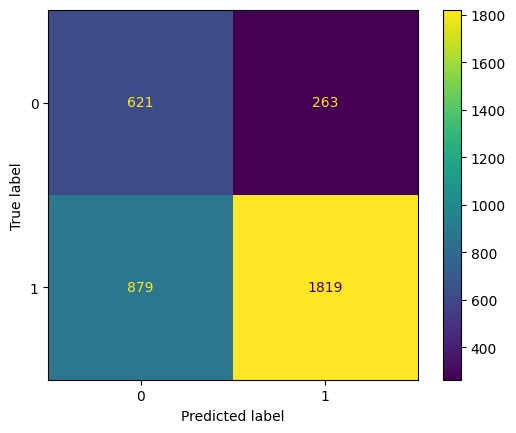

In [232]:
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()
plt.show()

In [233]:
precision_score(y_test, y_classes)

0.8736791546589817

In [234]:
recall_score(y_test, y_classes)

0.6742031134173462

In [235]:
f1_score(y_test, y_classes)

0.7610878661087866

In [236]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs',penalty='l2',max_iter=100)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
result.append(['Logistic Regression', precision_score(y_test, y_pred).round(2), recall_score(y_test, y_pred).round(2), f1_score(y_test, y_pred).round(2)])

c:\Users\ryane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


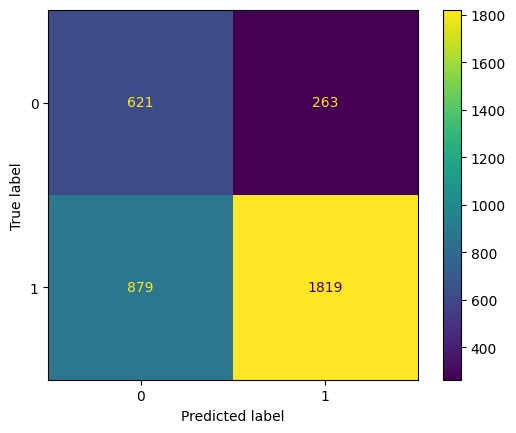

In [237]:
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()
plt.show()

In [238]:
precision_score(y_test,y_pred)

0.8054198134162595

In [239]:
precision_score(y_test,y_pred)

0.8054198134162595

In [240]:
precision_score(y_test,y_pred)

0.8054198134162595

In [241]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
result.append(['Random Forest', precision_score(y_test, y_pred).round(2), recall_score(y_test, y_pred).round(2), f1_score(y_test, y_pred).round(2)])

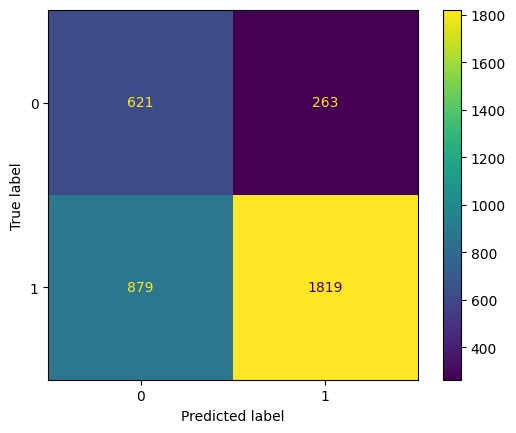

In [242]:
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()
plt.show()

In [243]:
precision_score(y_test,y_pred)

0.8801480795927811

In [244]:
recall_score(y_test,y_pred)

0.7049666419570052

In [245]:
f1_score(y_test,y_pred)

0.7828771352130068

In [246]:
classificators = pd.DataFrame(result, columns=['Classificator', 'Precision', 'Recall', 'F1'])
classificators.to_csv('classificators.csv',index=False)

In [247]:
classificators

,Classificator,Precision,Recall,F1
0,XGBoost,0.89,0.75,0.82
1,K-Nearest Neighbors,0.88,0.72,0.79
2,Neural Network,0.87,0.67,0.76
3,Logistic Regression,0.81,0.67,0.73
4,Random Forest,0.88,0.70,0.78
